SyntaxError: invalid syntax (<ipython-input-182-4f07655337ec>, line 1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [4]:
#reading the excel file 
df = pd.read_excel("ex2-damage_data.xlsx",)

In [6]:
# Look into glimpse of the file. 
df.head()

,water height [cm],damage [Euro]
0,0.021688,739.880128
1,0.353481,1766.325812
2,1.613333,5147.555573
3,4.800000,10320.160064
4,2.507581,6415.920567


In [445]:
# getting info of the dataframe, checking if any NAs or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5533 entries, 0 to 5532
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   water height [cm]  5533 non-null   float64
 1   damage [Euro]      5533 non-null   float64
dtypes: float64(2)
memory usage: 86.6 KB


In [446]:
# Shape of the data frame
df.shape

(5533, 2)

In [447]:
df.describe() # provides important metrics of the dataframe like mean, sd

,water height [cm],damage [Euro]
count,5533.000000,5533.000000
mean,8.607189,9791.667766
std,12.155097,7264.841436
min,0.000147,39.444992
25%,0.964052,3846.356804
50%,5.600000,9085.477164
75%,12.200000,14221.521634
max,219.587500,72523.766675


In [9]:
data = df.values # Extract the values of dataframe to variable data

In [11]:
#Subset water height (cm) and damage claimed (Euro) to depth and cost variable
depth = data[:,0]
cost = data[:,1]

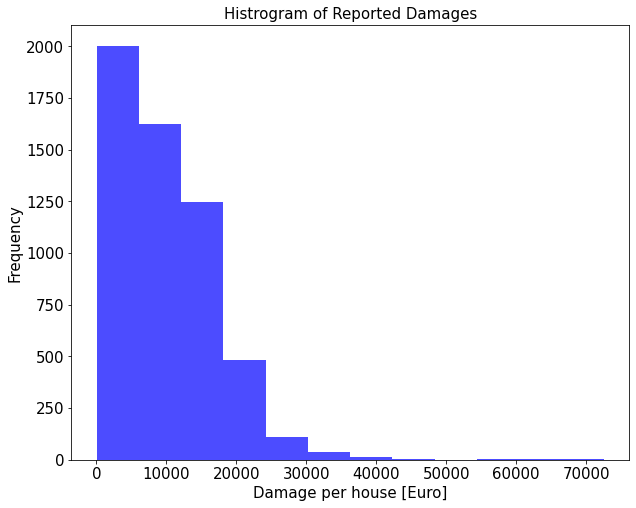

In [19]:
# Histogram of damage claims (frequency of certain damage intervals)
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=cost, bins=12, color='b',alpha=0.7, rwidth=1.0,linewidth =10.0, histtype ='bar', label="histogram")
#plt.grid(axis='y', alpha=0.75)
plt.xlabel('Damage per house [Euro]',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Histrogram of Reported Damages',fontsize=15)
plt.savefig('Histogram')

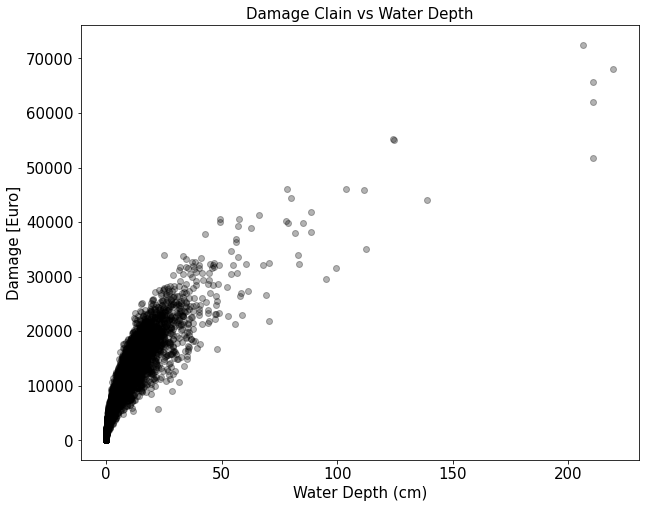

In [126]:
# Seeing how damage claim and depth are related. 
plt.figure(figsize=[10,8])
plt.scatter(depth,cost, marker = 'o', color = 'k', alpha = 0.3)
plt.xlabel('Water Depth (cm)',fontsize=15)
plt.ylabel('Damage [Euro]',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Damage Clain vs Water Depth',fontsize=15)
plt.savefig('Scatter')

In [24]:
#correlation between water depth and the damage claimed
np.corrcoef(depth,cost)

array([[1.        , 0.84559254],
       [0.84559254, 1.        ]])

In [127]:
# Define linear function for fitting 
def linear (x,m,b):
    return m*x+b
guess = [1,1]

In [128]:
# curve fitting toolbox from scipy and returns the parameter as well as covariance.
fit = curve_fit(linear,depth,cost,p0=guess)

In [129]:
ans, cov = fit
fit_m,fit_b = ans

In [130]:
#Equation of fitted line 
y = fit_m*depth+fit_b

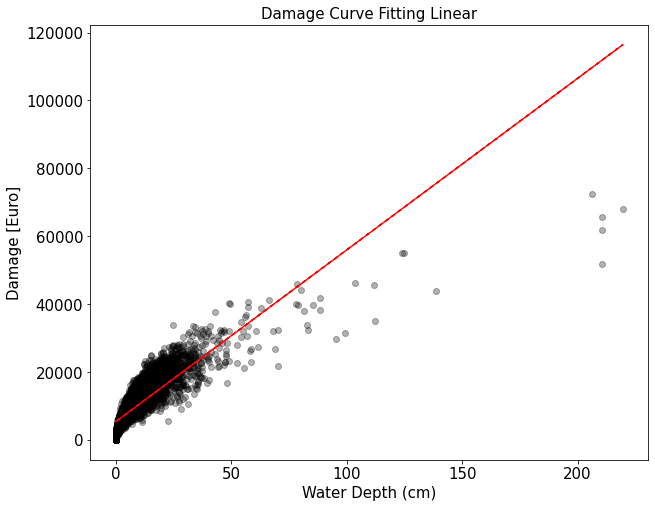

In [131]:
# Damage Curve fitting -Linear
plt.figure(figsize=[10,8])
plt.plot(depth, y, '--', color='red')
plt.scatter(depth,cost, marker = 'o', color = 'k', alpha = 0.3)
plt.xlabel('Water Depth (cm)',fontsize=15)
plt.ylabel('Damage [Euro]',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Damage Curve Fitting Linear',fontsize=15)
plt.savefig('Damage_linear')

In [132]:
# Prints the correlation between fitted function and original cost.
print(r2_score(y,cost))

0.6014509174376883


In [133]:
# Residuals
r = cost - y

In [134]:
#Mean of residual
np.mean(r)

-3.8065897684948967e-07

In [135]:
# Standard deviation of residual
np.std(r)

3877.831562867698

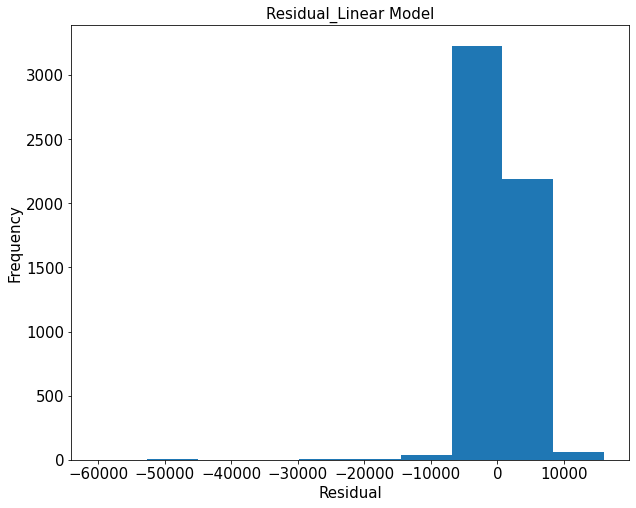

In [105]:
plt.figure(figsize=[10,8])
plt.hist(r)
plt.xlabel('Residual',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Residual_Linear Model',fontsize=15)
plt.savefig('Residual_Linear')

In [136]:
#Defining Linear Log Model
def logarithmic (x,m,b):
    return m*x+b
guess = [1,1]

In [137]:
# Curve Fitting
fit_log = curve_fit(logarithmic,depth,np.log(cost),p0=guess)
ans, cov = fit_log
fit_m,fit_b = ans

In [138]:
# Fitted Function
y_log = fit_m*depth+fit_b

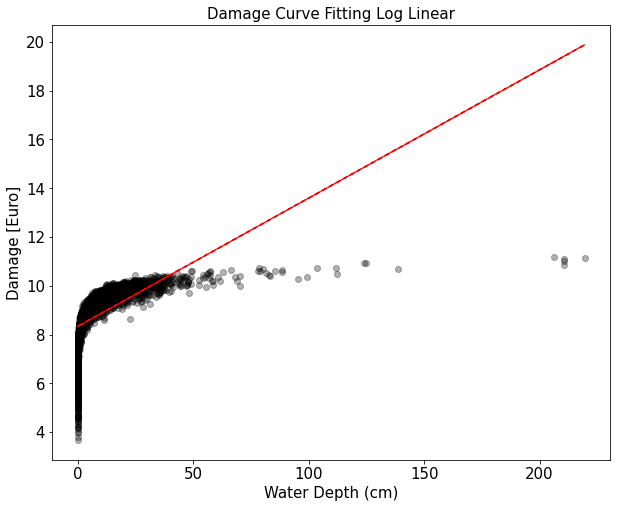

In [139]:
# Visualising results
plt.figure(figsize=[10,8])
plt.plot(depth, y_log, '--', color='red')
plt.scatter(depth,np.log(cost), marker = 'o', color = 'k', alpha = 0.3)
plt.xlabel('Water Depth (cm)',fontsize=15)
plt.ylabel('Damage [Euro]',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Damage Curve Fitting Log Linear',fontsize=15)
plt.savefig('Damage_loglinear')

In [140]:
# Correlation
print(r2_score(np.exp(y_log),cost))

-0.000508509475474872


In [142]:
# Residual 
r = cost - np.exp(y_log)
np.mean(r)
#np.std(r)

-266478.65766189963

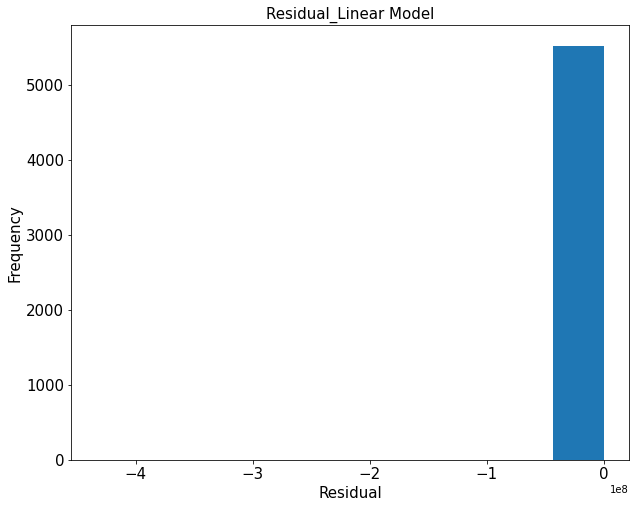

In [93]:
# Plotting of residual 
plt.figure(figsize=[10,8])
plt.hist(r)
plt.xlabel('Residual',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Residual_LogLinear Model',fontsize=15)
plt.savefig('Residual_LogLinear')

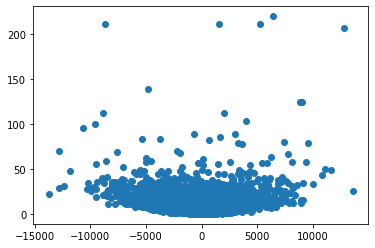

In [79]:
plt.scatter(r,depth)

In [143]:
# Define square root transformation
def sqrt (x,m,b):
    return m*x+b
guess = [1,1]

In [144]:
#Curve Fitting
fit_log = curve_fit(sqrt,depth,np.sqrt(cost),p0=guess)
ans, cov = fit_log
fit_m,fit_b = ans

In [145]:
# Fitted model
y_sqrt = fit_m*depth+fit_b

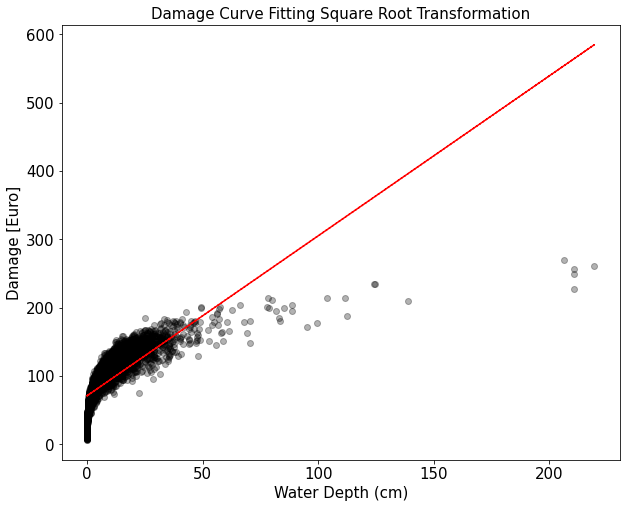

In [146]:
plt.figure(figsize=[10,8])
plt.plot(depth, y_sqrt, '--', color='red')
plt.scatter(depth,np.sqrt(cost), marker = 'o', color = 'k', alpha = 0.3)
plt.xlabel('Water Depth (cm)',fontsize=15)
plt.ylabel('Damage [Euro]',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Damage Curve Fitting Square Root Transformation',fontsize=15)
plt.savefig('Damage_Sqrt')

In [147]:
#Correlation
print(r2_score(np.power(y_sqrt,2),cost))

0.3617397750008541


In [149]:
#Residual
r = cost - np.power(y_sqrt,2)
np.mean(r)
np.std(r)

9268.777536396388

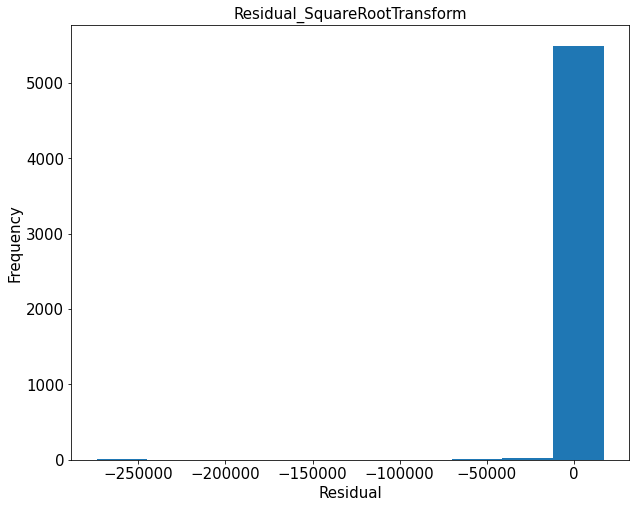

In [116]:
plt.figure(figsize=[10,8])
plt.hist(r)
plt.xlabel('Residual',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Residual_SquareRootTransform',fontsize=15)
plt.savefig('Residual_sqrt')

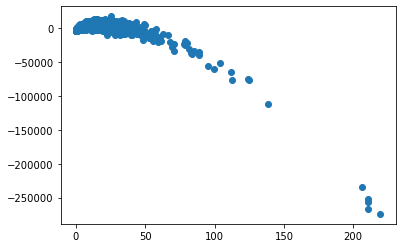

In [114]:
plt.scatter(depth,r)

In [150]:
#Define Power Transform
def power_transform (x,a,b):
    return a*np.power(x,b)

In [151]:
#Curve Fitting
fit_pow = curve_fit(power_transform,depth,cost,p0=guess)
ans, cov = fit_pow
fit_a,fit_b = ans

In [152]:
#Fitted Model
depth_new = np.linspace(np.min(depth),np.max(depth),100)
y_pow = fit_a*(np.power(depth_new,fit_b))

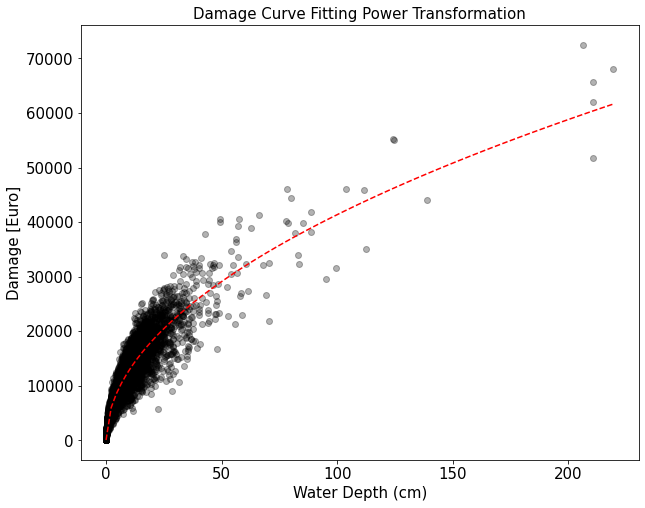

In [153]:
#Plotting
plt.figure(figsize=[10,8])
plt.plot(depth_new, y_pow, '--', color='red')
plt.scatter(depth,cost, marker = 'o', color = 'k', alpha = 0.3)
plt.xlabel('Water Depth (cm)',fontsize=15)
plt.ylabel('Damage [Euro]',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Damage Curve Fitting Power Transformation',fontsize=15)
plt.savefig('Damage_Power')

In [154]:
#Residual
r = cost - fit_a*(np.power(depth,fit_b))

In [155]:
np.mean(r)

10.788047407869403

In [156]:
np.std(r)

2337.3301621044216

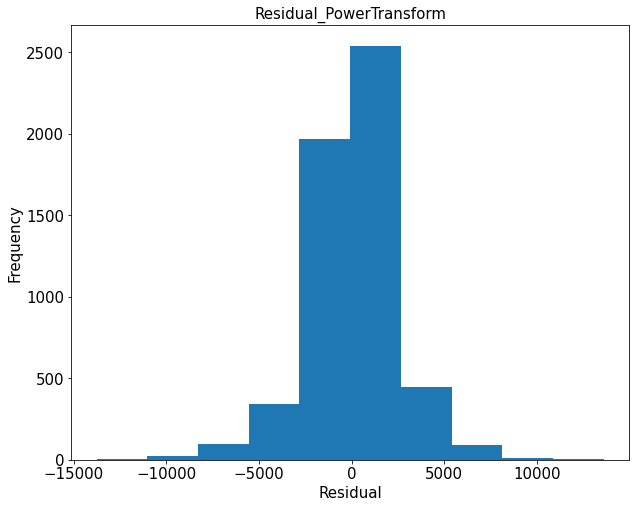

In [125]:
plt.figure(figsize=[10,8])
plt.hist(r,bins=10)
plt.xlabel('Residual',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Residual_PowerTransform',fontsize=15)
plt.savefig('Residual_power')

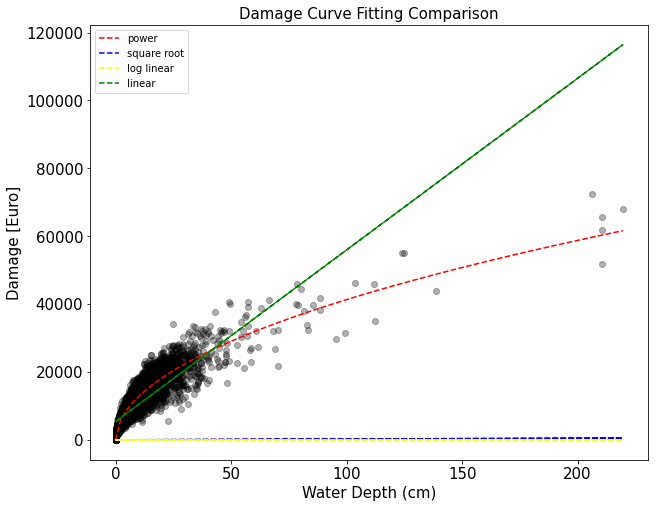

In [162]:
# Scatter Plots with all Functions
plt.figure(figsize=[10,8])
plt.scatter(depth,cost, marker = 'o', color = 'k', alpha = 0.3)
plt.plot(depth_new, y_pow, '--', color='red', label = 'power')
plt.plot(depth, y_sqrt, '--', color='blue', label = 'square root')
plt.plot(depth, y_log, '--', color='yellow', label = 'log linear')
plt.plot(depth, y, '--', color='green', label = 'linear')
plt.xlabel('Water Depth (cm)',fontsize=15)
plt.ylabel('Damage [Euro]',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Damage Curve Fitting Comparison',fontsize=15)
plt.legend()
plt.savefig('Damage_Comparison')

In [171]:
#Input Data
houses_with_depth_less15=40
houses_with_depth_15to45=30
houses_with_depth_45to75=10
houses_with_depth_great75=5

In [172]:
#Subsetting depth less than 15 cm 
depth_new[depth_new<15]

array([1.46970006e-04, 2.21820104e+00, 4.43625511e+00, 6.65430918e+00,
       8.87236325e+00, 1.10904173e+01, 1.33084714e+01])

In [173]:
#Average cost of the damage less than 15 cm depth
average_cost_depth_lessthan15= np.mean(fit_a*(np.power(depth_new[depth_new<=15],fit_b)))

In [174]:
#Subsetting depth 15 to 45 cm
depth_15to45 = depth_new[np.logical_and(depth_new > 15, depth_new <=45)]
##Average cost of the damage greater than 15 and less than 45 cm
average_cost_15to45 = np.mean(fit_a*(np.power(depth_15to45,fit_b)))

In [175]:
#Subsetting depth 45 to 75 cm
depth_45to75 = depth_new[np.logical_and(depth_new > 45, depth_new <=75)]

In [176]:
#Average cost of the damage greater than 45 and less than 75 cm
average_cost_45to75 = np.mean(fit_a*(np.power(depth_45to75,fit_b)))

In [177]:
average_cost_45to75

31798.0091318585

In [178]:
#Average cost of the damage greater 75 cm
average_cost_depth_greaterthan75= np.mean(fit_a*(np.power(depth_new[depth_new>75],fit_b)))

In [179]:
average_cost_depth_greaterthan75

49825.52512950519

In [180]:
#Total damage calculated by multplying average damage of respective damage class with total number of households in damage class
Total_damage = houses_with_depth_less15*average_cost_depth_lessthan15 + houses_with_depth_15to45*average_cost_15to45 + houses_with_depth_45to75*average_cost_45to75 + houses_with_depth_great75*houses_with_depth_great75

In [181]:
#Total Damage due to flood
Total_damage

1356860.9661525646